Create figures for scoping review

Import packages

In [2]:
# Import packages
library(data.table)
library(ggplot2)
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Import all the data:

### META DATA


In [3]:
# Meta data
datMeta <- read.csv("tblStudyMeta.csv", header=T)
head(datMeta)

,studyRef,assessedBy,firstAuthor,year,species,countryStudy,mainOutcome,studyScore
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,1182475512,AS/SE,O'Higgins,2014,Human,Ireland,Both,II
2,1182475524,AS/SE,Cox,2019,Human,Belgium,Both,III
3,1182476286,AS/SE,Assaf-Balut,2019,Human,Spain,Both,II
4,1182476955,AS/SE,Assaf-Balut,2019,Human,Spain,Both,II
5,1182477024,AS/SE,Fondjo,2020,Human,Ghana,Mother,II
6,1182477025,AS/SE,Shamsi,2010,Human,Pakistan,Mother,III



### INFECTION DATA


In [4]:
# Infection data
datInf<-read.csv("tblStudyInfections.csv",header=T)
head(datInf)

,studyRef,infectionType,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1182475512,Bacterial infection,,,,,,,,,
2,1182475524,Inflammatory/immune reponse,,,,,,,,,
3,1182476286,Urinary/Genital Tract Infection,,,,,,,,,
4,1182476955,Urinary/Genital Tract Infection,,,,,,,,,
5,1182477024,Malaria,,,,,,,,,
6,1182477025,Urinary/Genital Tract Infection,,,,,,,,,


In [5]:
# long format with multiple infection types per study shown in multiple rows
datInf_long <- datInf %>%
  pivot_longer(cols = -studyRef, values_to = "infectionType") %>%
  mutate(infectionType = na_if(infectionType, "")) %>%
  filter(!is.na(infectionType))

#trim white space
datInf_long$infectionType <-trimws(datInf_long$infectionType)

In [6]:
# Categorise Infection data

#What are all the Infection types?
unique(datInf_long$infectionType)

## Table catagorising infection types
infection_lookup <- data.frame(
  Infection = c("HPV", "Yeast infection", "Sepsis", "Systemic infection", "Tuberculosis",
                "Toxoplasmosis", "Zika virus", "Autoimmune disorder", "Rubella immune status",
                "Herpes virus (HSV)", "Influenza", "Pyelonephritis (Kidney infection)", "Fever or cold",
                "Periodontal", "Group B streptococcus", "H. pylori infection", "Vaccine response",
                "Bacterial infection", "LPS injection", "C-reactive protein",
                "Unspecified maternal infection", "Hepatitis B/C", "Intra-amniotic/intra-uterine infection (chorioamnionitis)",
                "STI", "Respiratory infection", "Other", "Malaria", 
                "Parasitic infection (nematode/hookworm etc)", "HIV", "Covid-19", "Urinary/Genital Tract Infection",
                "Inflammatory/immune reponse"),
  InfCat = c("Viral", "Fungal", "Bacterial", "General", "Bacterial",
             "Parasitic", "Viral", "Immune", "Viral",
             "Viral", "Viral", "Bacterial", "General",
             "General", "Bacterial", "Bacterial", "Immune",
             "Bacterial", "Immune", "Immune",
             "General", "Viral", "Bacterial",
             "Bacterial", "Bacterial", "General", "Parasitic",
             "Parasitic", "Viral", "Viral", "Bacterial", "Immune")
)

#Check that all the infection types have been categorised
setdiff(unique(datInf_long$infectionType), unique(infection_lookup$Infection))
setdiff(unique(infection_lookup$Infection), unique(datInf_long$infectionType))

#Create catagorised dataset
# Left join infection_lookup with datInf
datInfType_long <- merge(datInf_long, infection_lookup, by.x = "infectionType", by.y = "Infection", all.x = TRUE)
datInfType_long <- datInfType_long[,-3]
head(datInfType_long[order(datInfType_long$studyRef),])


[1] "Bacterial infection"                                      
 [2] "Inflammatory/immune reponse"                              
 [3] "Urinary/Genital Tract Infection"                          
 [4] "Malaria"                                                  
 [5] "Respiratory infection"                                    
 [6] "Fever or cold"                                            
 [7] "Other"                                                    
 [8] "Influenza"                                                
 [9] "Periodontal"                                              
[10] "Covid-19"                                                 
[11] "LPS injection"                                            
[12] "HIV"                                                      
[13] "Parasitic infection (nematode/hookworm etc)"              
[14] "H. pylori infection"                                      
[15] "Hepatitis B/C"                                            
[16] "STI"                                                      
[17] "Vaccine response"                                         
[18] "C-reactive protein"                                       
[19] "Intra-amniotic/intra-uterine infection (chorioamnionitis)"
[20] "Group B streptococcus"                                    
[21] "Toxoplasmosis"                                            
[22] "Herpes virus (HSV)"                                       
[23] "Rubella immune status"                                    
[24] "Unspecified maternal infection"                           
[25] "Pyelonephritis (Kidney infection)"                        
[26] "Zika virus"                                               
[27] "Sepsis"                                                   
[28] "Yeast infection"                                          
[29] "Autoimmune disorder"                                      
[30] "HPV"                                                      
[31] "Systemic infection"                                       
[32] "Tuberculosis"

character(0)

character(0)

,infectionType,studyRef,InfCat
,<chr>,<int>,<chr>
477,LPS injection,1182475095,Immune
275,Inflammatory/immune reponse,1182475123,Immune
630,Parasitic infection (nematode/hookworm etc),1182475134,Parasitic
262,HIV,1182475144,Viral
505,Malaria,1182475144,Parasitic
533,Malaria,1182475147,Parasitic


In [7]:

### NUTRITION DATA



In [8]:
datNut<-read.csv("tblStudyNutrition.csv",header=T)

# long format with multiple nutrient types per study shown in multiple rows
datNut_long <- datNut %>%
  pivot_longer(cols = -studyRef, values_to = "nutritionType") %>%
  mutate(nutritionType = na_if(nutritionType, "")) %>%
  filter(!is.na(nutritionType))

#trim white space
datNut_long$nutritionType <-trimws(datNut_long$nutritionType)



In [9]:
#What are all the nutritionTypes?
unique(datNut_long$nutritionType)

# add categorisation
# Lookup table with shortened category names

##Notes: 
#### Anaemia has been changed to a Clinical Indicator rather than Anthromometric
#### Minerals and Vitamins have been combined into Micronutrients
#### Because of the above combination we can now add Multivitamin/micronutrient supplement to Micronutrients. 

nutrient_lookup <- data.frame(
  Nutrition = c("Boron", "Phosphorus", "Magnesium", "Calcium", "Copper", "Selenium", "Zinc", "Iron",
                "Vitamin A", "Vitamin B2/B6/B12", "Vitamin C", "Vitamin D", "Vitamin E", "Folic acid",
                "Protein", "Fatty acids", "Fibre", "High fat diet",
                "Multivitamin/micronutrient supplement etc",
                "BMI", "Gestational weight gain", "Mid-upper arm circumference (MUAC)", "Anaemia",
                "Dietary diversity/change", "Other"),
  Category = c(
    "Micronutrients", "Micronutrients", "Micronutrients", "Micronutrients",
    "Micronutrients", "Micronutrients", "Micronutrients", "Micronutrients",
    
    "Micronutrients", "Micronutrients", "Micronutrients", "Micronutrients",
    "Micronutrients", "Micronutrients",
    
    "Macronutrients", "Macronutrients", "Macronutrients", "Macronutrients",
    
    "Micronutrients",
    
    "Anthropometrics", "Anthropometrics", "Anthropometrics", "Clinical Indicator",
    
    "Diet/Other", "Diet/Other"
  ),
  stringsAsFactors = FALSE
)



#Check that all the nutrition types have been categorised
setdiff(unique(datNut_long$nutritionType), unique(nutrient_lookup$Nutrition))
setdiff(unique(nutrient_lookup$Nutrition), unique(datNut_long$nutritionType))

#Create catagorised dataset
# Left join nutrient_lookup with datNut
datNutType_long <- merge(datNut_long, nutrient_lookup, by.x = "nutritionType", by.y = "Nutrition", all.x = TRUE)
datNutType_long <- datNutType_long[,-3] #remove "name" column
head(datNutType_long[order(datNutType_long$studyRef),])





[1] "BMI"                                      
 [2] "Dietary diversity/change"                 
 [3] "Anaemia"                                  
 [4] "Folic acid"                               
 [5] "Iron"                                     
 [6] "Mid-upper arm circumference (MUAC)"       
 [7] "Vitamin A"                                
 [8] "Other"                                    
 [9] "Vitamin B2/B6/B12"                        
[10] "Zinc"                                     
[11] "Vitamin D"                                
[12] "Vitamin C"                                
[13] "Magnesium"                                
[14] "Vitamin E"                                
[15] "Fatty acids"                              
[16] "Calcium"                                  
[17] "Copper"                                   
[18] "Boron"                                    
[19] "Protein"                                  
[20] "Multivitamin/micronutrient supplement etc"
[21] "High fat diet"                            
[22] "Gestational weight gain"                  
[23] "Selenium"                                 
[24] "Fibre"                                    
[25] "Phosphorus"

character(0)

character(0)

,nutritionType,studyRef,Category
,<chr>,<int>,<chr>
683,Iron,1182475095,Micronutrients
82,BMI,1182475123,Anthropometrics
606,Folic acid,1182475134,Micronutrients
680,Iron,1182475134,Micronutrients
810,Other,1182475134,Diet/Other
898,Vitamin A,1182475134,Micronutrients



### PREGNANCY OUTCOMES



In [10]:
## This data was collected as MaternalOutcomes and OffspringOutcomes. We will combine these data into a single PregnancyOutcome column


######## Maternal data
datMat<-read.csv("tblStudyMaternalOutcomes.csv",header=T)

# long format with multiple nutrient types per study shown in multiple rows
datMat_long <- datMat %>%
  pivot_longer(cols = -studyRef, values_to = "maternalOutcomeType") %>%
  mutate(maternalOutcomeType = na_if(maternalOutcomeType, "")) %>%
  filter(!is.na(maternalOutcomeType))

#trim white space
datMat_long$maternalOutcomeType <-trimws(datMat_long$maternalOutcomeType)
datMat_long <- datMat_long[,-2]

#Remove all "None" entries (~NA in our data)
datMat_long[datMat_long == "None"] <- NA
datMat_long <- na.omit(datMat_long)

#View data
head(datMat_long[order(datMat_long$studyRef),])

###### Offspring data
datOff<-read.csv("tblStudyOffspringOutcomes.csv",header=T)

# long format with multiple nutrient types per study shown in multiple rows
datOff_long <- datOff %>%
  pivot_longer(cols = -studyRef, values_to = "offspringOutcomeType") %>%
  mutate(offspringOutcomeType = na_if(offspringOutcomeType, "")) %>%
  filter(!is.na(offspringOutcomeType))

#trim white space
datOff_long$offspringOutcomeType <-trimws(datOff_long$offspringOutcomeType)
datOff_long <- datOff_long[,-2]

#Remove all "None" entries (~NA in our data)
datOff_long[datOff_long == "None"] <- NA
datOff_long <- na.omit(datOff_long)


#View data
head(datOff_long[order(datOff_long$studyRef),])
unique(datOff_long$offspringOutcomeType)

studyRef,maternalOutcomeType
<int>,<chr>
1182475095,Biomarkers of immunity - maternal
1182475123,Placental inflammation
1182475123,Other - maternal
1182475134,Anaemia - maternal
1182475144,Anaemia - maternal
1182475147,Anaemia - maternal


studyRef,offspringOutcomeType
<int>,<chr>
1182475095,Behavioural change
1182475159,Birth weight
1182475165,Birth weight
1182475165,Gestational age (Large or Small)
1182475165,Neonate length
1182475165,Head circumference


[1] "Birth weight"                       "Apgar score"                       
 [3] "Gestational age (Large or Small)"   "NICU admission"                    
 [5] "Other - maternal"                   "Gestational age (Days/Weeks)"      
 [7] "Cord blood pH"                      "Respiratory distress"              
 [9] "Congenital malformations"           "Congenital heart disease"          
[11] "Growth"                             "Macrosomia"                        
[13] "Foetal distress"                    "Neonatal death"                    
[15] "COVID status"                       "Behavioural change"                
[17] "Neonate length"                     "Head circumference"                
[19] "Cleft palate"                       "Microcephaly"                      
[21] "Gene expression - offspring"        "Language and motor development"    
[23] "Biomarkers of immunity - offspring" "Autism spectrum disorder"          
[25] "Motor development"                  "Neonatal encephalopathy"

In [11]:
# Combine the two datasets into a list of Pregnancy Outcomes. 
# use the PregnancyOutcomes lookup table to create a Pregnancy Outcomes variable df. 

#1. Rename columns to facilitate rbind
names(datOff_long)[2] <- "pregnancyOutcomeType"
names(datMat_long)[2] <- "pregnancyOutcomeType"

datPreg_long <- bind_rows(datOff_long, datMat_long)



#What are all the pregnancyOutcomeTypes?
unique(datPreg_long$pregnancyOutcomeType)

# add categorisation
# Lookup table with shortened category names

##Notes: 
#### None means no data/NA


pregnancy_lookup <- data.frame(Pregnancy = c("Mode of delivery / caesarean section rate", "Maternal mortality", "Hypertension (pregnancy-induced)",
"Pre-eclampsia", "Anaemia", "Gestational diabetes", "Haemorrhage", "Hospitalisation or ICU admission", "Postterm pregnancy",
"Placental abruption", "Maternal mental health", "Cancer risk", "Venous thromboembolism / pulmonary embolism / deep vein thrombosis",
"Prolonged labour (labour dystocia)", "Hyperemesis gravidarum", "Ectopic pregnancy", "COVID status", 
"Stillbirth", "Miscarriage / spontaneous abortion",
"Perinatal mortality", "Neonatal death", "NICU admission", "Birth weight", "Gestational age (Large or Small)", "Gestational age (Days/Weeks)",
"Apgar score", "Cord blood pH", "Respiratory distress", "Congenital malformations", "Congenital heart disease", "Foetal distress", "Macrosomia",
"Intrauterine growth restriction (IUGR)", "Neonatal encephalopathy", "Cleft palate", "Microcephaly", "Neonate length", "Head circumference",
"Pre-term birth", "Pre-term pre-labour rupture of membranes (PPROM)", "PROM", "Placental inflammation", "Placental size", "Placental lesions",
"Biomarkers of immunity - maternal", "Biomarkers of immunity - offspring", "Haemoglobin levels - maternal", "Haemoglobin levels - offspring", 
"Gene expression - maternal", "Gene expression - offspring", "DNA methylation - maternal", "DNA methylation - maternal - offspring", 
"Growth", "Language and motor development", "Motor development",
"Autism spectrum disorder", "Behavioural change", "Other", "None"),
Category = c(
rep("Maternal Outcomes", 17),
rep("Foetal and Neonatal Outcomes", 21),
rep("Pregnancy Complications", 3),
rep("Placental and Immunological Factors", 5),
rep("Molecular and Clinical Biomarkers", 6),
rep("Developmental and Long-term Child Outcomes", 5),
rep("Other", 1),
rep("None", 1)
),
    stringsAsFactors = FALSE
)





#Check that all the nutrition types have been categorised
setdiff(unique(datPreg_long$pregnancyOutcomeType), unique(pregnancy_lookup$Pregnancy))
setdiff(unique(pregnancy_lookup$Pregnancy), unique(datPreg_long$pregnancyOutcomeType))

#Create catagorised dataset
# Left join nutrient_lookup with datNut
datPregType_long <- merge(datPreg_long, pregnancy_lookup, by.x = "pregnancyOutcomeType", by.y = "Pregnancy", all.x = TRUE)

head(datPregType_long[order(datPregType_long$studyRef),])


[1] "Birth weight"                                                      
 [2] "Apgar score"                                                       
 [3] "Gestational age (Large or Small)"                                  
 [4] "NICU admission"                                                    
 [5] "Other - maternal"                                                  
 [6] "Gestational age (Days/Weeks)"                                      
 [7] "Cord blood pH"                                                     
 [8] "Respiratory distress"                                              
 [9] "Congenital malformations"                                          
[10] "Congenital heart disease"                                          
[11] "Growth"                                                            
[12] "Macrosomia"                                                        
[13] "Foetal distress"                                                   
[14] "Neonatal death"                                                    
[15] "COVID status"                                                      
[16] "Behavioural change"                                                
[17] "Neonate length"                                                    
[18] "Head circumference"                                                
[19] "Cleft palate"                                                      
[20] "Microcephaly"                                                      
[21] "Gene expression - offspring"                                       
[22] "Language and motor development"                                    
[23] "Biomarkers of immunity - offspring"                                
[24] "Autism spectrum disorder"                                          
[25] "Motor development"                                                 
[26] "Neonatal encephalopathy"                                           
[27] "Mode of delivery / caesarean section rate"                         
[28] "Pre-term birth"                                                    
[29] "Maternal mortality"                                                
[30] "Stillbirth"                                                        
[31] "Gene expression - maternal"                                        
[32] "Pre-eclampsia"                                                     
[33] "Hypertension (pregnancy-induced)"                                  
[34] "Anaemia - maternal"                                                
[35] "Parasite load"                                                     
[36] "Gestational diabetes"                                              
[37] "Pre-term pre-labour rupture of membranes (PPROM)"                  
[38] "Haemorrhage"                                                       
[39] "Miscarriage / spontaneous abortion"                                
[40] "Perinatal mortality"                                               
[41] "Biomarkers of immunity - maternal"                                 
[42] "Placental inflammation"                                            
[43] "Hospitalisation or ICU admission"                                  
[44] "Haemoglobin levels - maternal"                                     
[45] "Postterm pregnancy"                                                
[46] "Intrauterine growth restriction (IUGR)"                            
[47] "Placental abruption"                                               
[48] "Maternal mental health"                                            
[49] "Cancer risk"                                                       
[50] "Venous thromboembolism / pulmonary embolism / deep vein thrombosis"
[51] "PROM"                                                              
[52] "Prolonged labour (labour dystocia)"                                
[53] "Hyperemesis gravidarum"                                            
[54] "Placental size"                                                    
[55] 

[1] "Other - maternal"   "Anaemia - maternal" "Parasite load"

[1] "Anaemia"                               
[2] "Haemoglobin levels - offspring"        
[3] "DNA methylation - maternal - offspring"
[4] "Other"                                 
[5] "None"

,pregnancyOutcomeType,studyRef,Category
,<chr>,<int>,<chr>
125,Behavioural change,1182475095,Developmental and Long-term Child Outcomes
287,Biomarkers of immunity - maternal,1182475095,Placental and Immunological Factors
1841,Other - maternal,1182475123,NA
1967,Placental inflammation,1182475123,Placental and Immunological Factors
14,Anaemia - maternal,1182475134,NA
12,Anaemia - maternal,1182475144,NA




# Full join pregnancy Outcome with Meta, Nutrition, and Infection

This creates one big table with all the input and output variables for a specific study. 



In [12]:
#List of all the dfs

dfs_list <- list(datMeta, datNutType_long, datInfType_long, datPregType_long)

# Full join all data frames by "studyRef"

datMetaNutInfPreg <- Reduce(function(x,y) full_join(x,y, by = "studyRef"), dfs_list)
datMetaNutInfPreg <- rename(datMetaNutInfPreg, "NutCat" = "Category.x", "PregCat" = "Category.y")

#Create a speciesCat column
datMetaNutInfPreg <- datMetaNutInfPreg %>% mutate(speciesCat = ifelse(species == "Human", "Human", "Other"))

                            
head(datMetaNutInfPreg)
dim(datMetaNutInfPreg)

,studyRef,assessedBy,firstAuthor,year,species,countryStudy,mainOutcome,studyScore,nutritionType,NutCat,infectionType,InfCat,pregnancyOutcomeType,PregCat,speciesCat
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1182475512,AS/SE,O'Higgins,2014,Human,Ireland,Both,II,BMI,Anthropometrics,Bacterial infection,Bacterial,Apgar score,Foetal and Neonatal Outcomes,Human
2,1182475512,AS/SE,O'Higgins,2014,Human,Ireland,Both,II,BMI,Anthropometrics,Bacterial infection,Bacterial,Birth weight,Foetal and Neonatal Outcomes,Human
3,1182475512,AS/SE,O'Higgins,2014,Human,Ireland,Both,II,BMI,Anthropometrics,Bacterial infection,Bacterial,Maternal mortality,Maternal Outcomes,Human
4,1182475512,AS/SE,O'Higgins,2014,Human,Ireland,Both,II,BMI,Anthropometrics,Bacterial infection,Bacterial,Mode of delivery / caesarean section rate,Maternal Outcomes,Human
5,1182475512,AS/SE,O'Higgins,2014,Human,Ireland,Both,II,BMI,Anthropometrics,Bacterial infection,Bacterial,Other - maternal,NA,Human
6,1182475512,AS/SE,O'Higgins,2014,Human,Ireland,Both,II,BMI,Anthropometrics,Bacterial infection,Bacterial,Pre-term birth,Pregnancy Complications,Human


[1] 6465   15

# PLOTS 

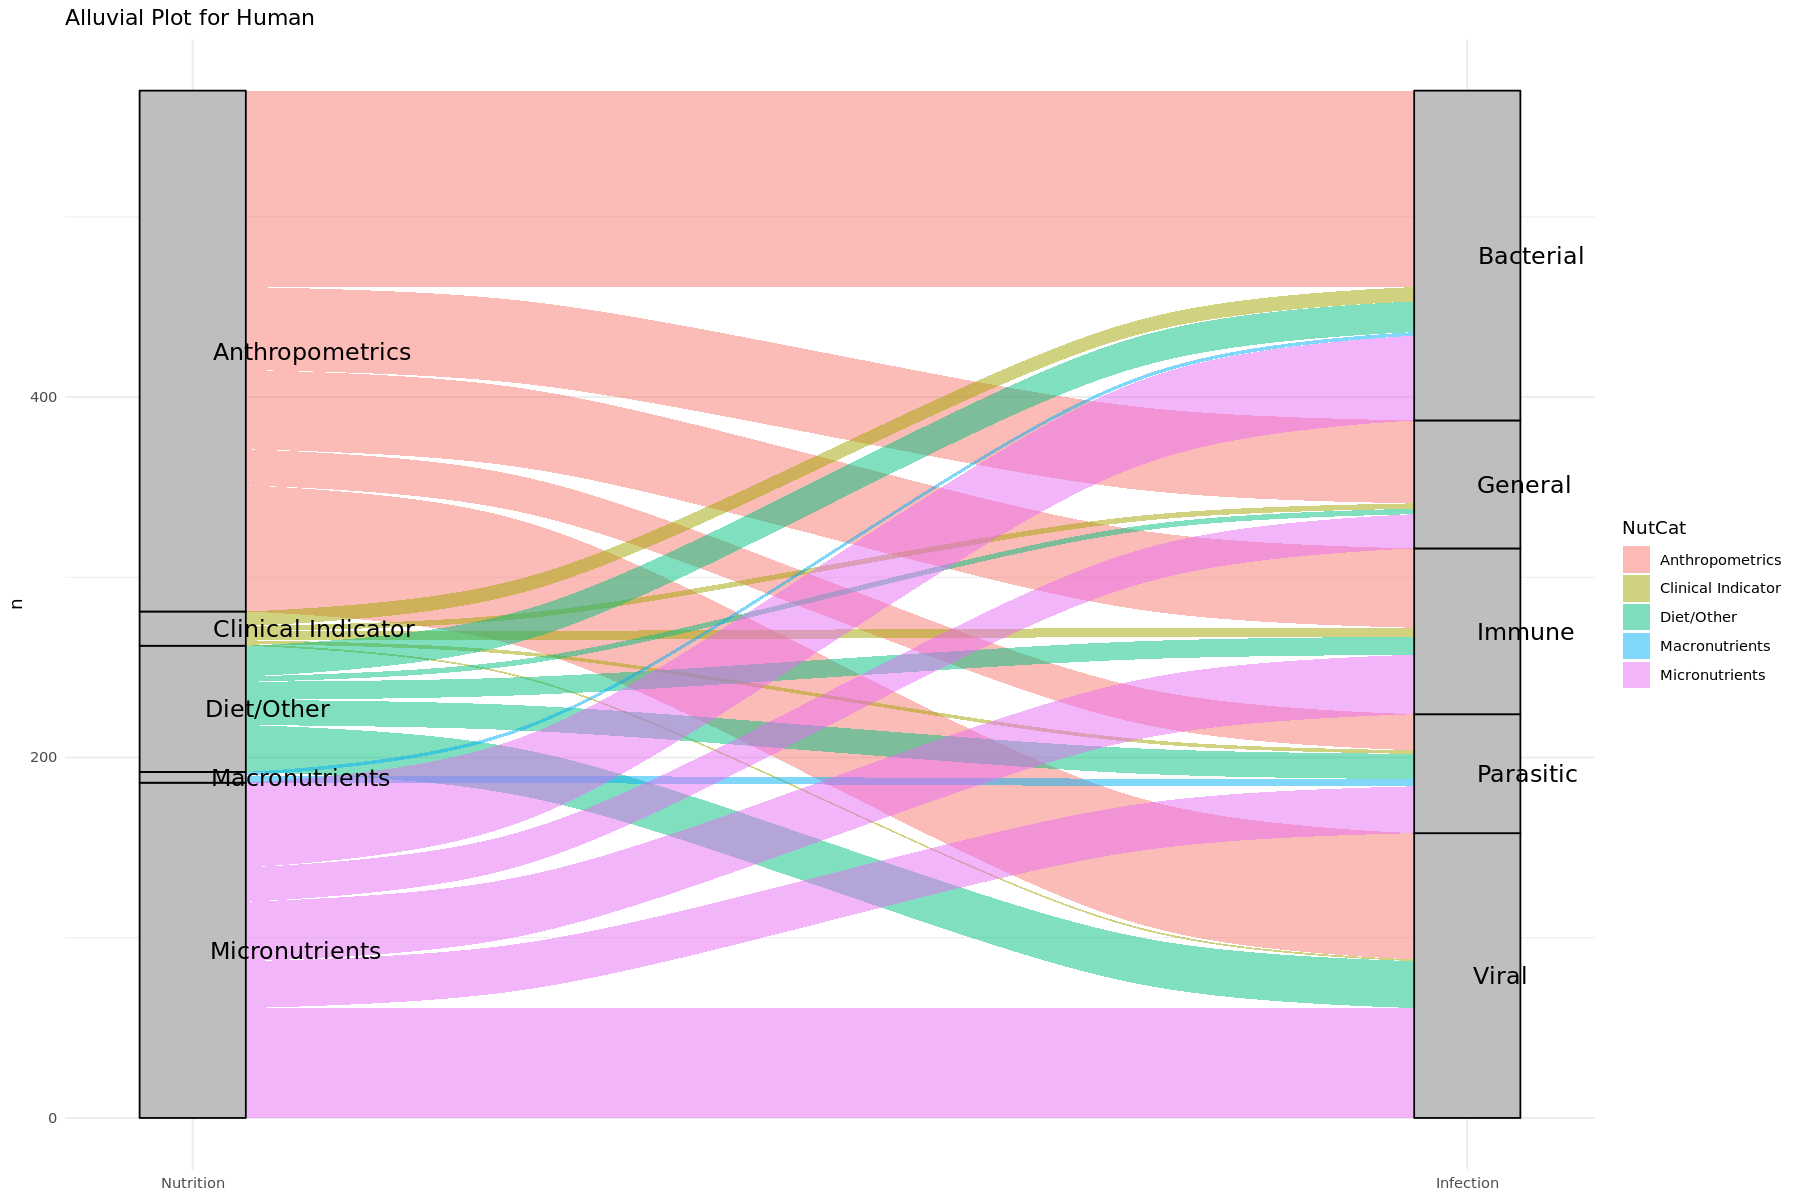

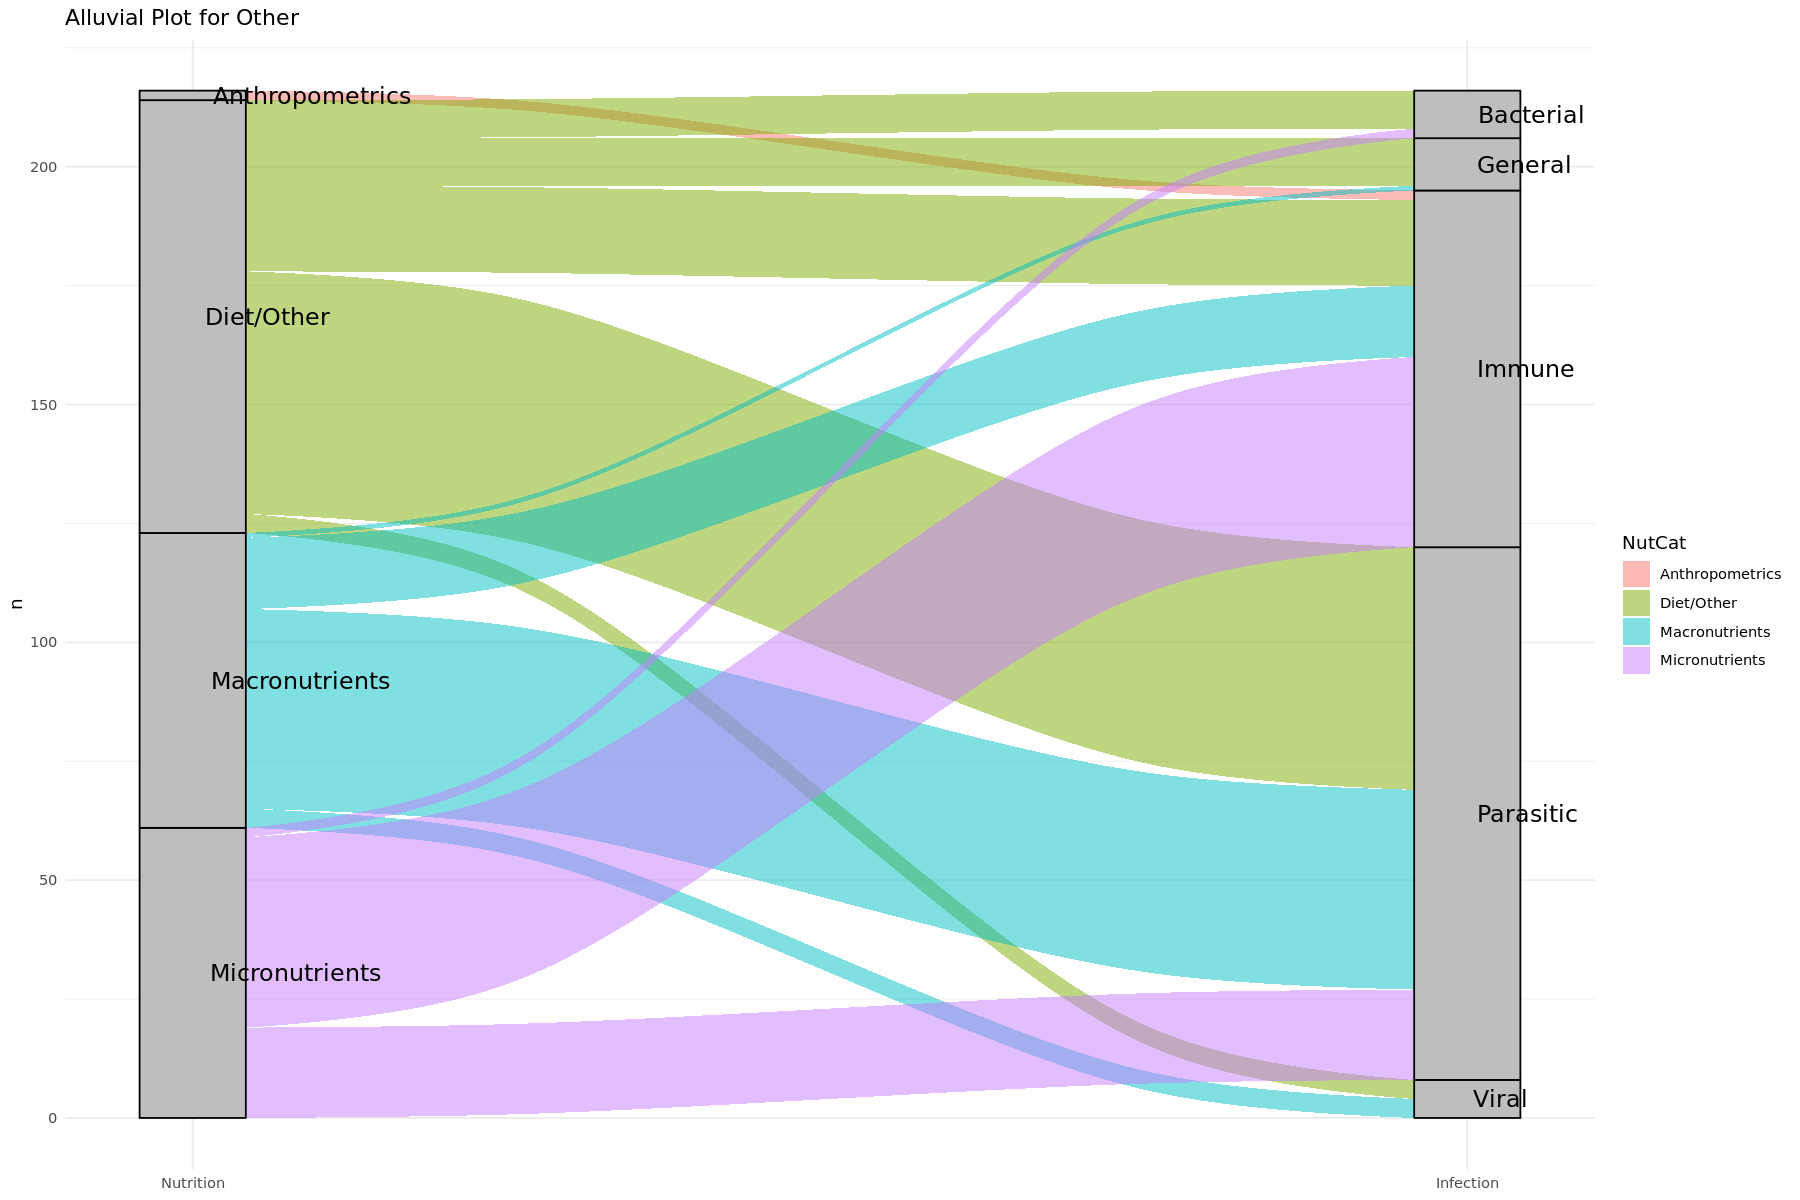

In [40]:
# Load required packages
library(ggplot2)
library(ggalluvial)
library(dplyr)

# Filter for studyScore == "I"
df_filtered <- datMetaNutInfPreg %>% filter(studyScore == "I")

# Function to plot alluvial diagram
plot_alluvial <- function(data, title) {
# Aggregate data to count flows
    flow_data <- data %>%
    count(NutCat, InfCat)

    ggplot(flow_data,
         aes(axis1 = NutCat, axis2 = InfCat, y = n)) +
    geom_alluvium(aes(fill = NutCat), width = 1/12) +
    geom_stratum(width = 1/12, fill = "grey", color = "black") +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 5, hjust = -0.1) +
    scale_x_discrete(limits = c("Nutrition", "Infection"), expand = c(.05, .05)) +
    ggtitle(title) +
    theme_minimal()
}

#set the default width of figures in notebook

options(repr.plot.width = 15, repr.plot.height = 10)


# Plot for Human
plot_alluvial(df_filtered %>% filter(speciesCat == "Human"), "Alluvial Plot for Human")

# Plot for Other
plot_alluvial(df_filtered %>% filter(speciesCat == "Other"), "Alluvial Plot for Other")


In [41]:
plot_alluvial_3level <- function(data, title, filename) {
  # Aggregate data to count flows
  flow_data <- data %>%
    count(NutCat, InfCat, PregCat)

  ggplot(flow_data,
         aes(axis1 = NutCat, axis2 = InfCat, axis3 = PregCat, y = n)) +
    geom_alluvium(aes(fill = NutCat), width = 1/12) +
    geom_stratum(width = 1/12, fill = "grey", color = "black") +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 3) +
    scale_x_discrete(limits = c("Nutrition", "Infection", "Pregnancy"), expand = c(.05, .05)) +
    ggtitle(title) +
    theme_minimal()

  ggsave(filename, plot = p, width = 15, height = 8, units = "in")
}
